In [48]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
iris_train_data = pd.read_csv('train_iris.csv')
iris_train_data.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [50]:
iris_test_data = pd.read_csv('test_iris.csv')
iris_test_data.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [51]:
rs = np.random.seed(0)

In [52]:
iris_train_data.isnull().sum()

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [53]:
iris_test_data.isnull().sum()

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [54]:
X_test = iris_test_data.drop(['species','Unnamed: 0'], axis=1)
y_test = iris_test_data.species

In [55]:
X_train = iris_train_data.drop(['species','Unnamed: 0'], axis=1)
y_train = iris_train_data.species

In [62]:
max_depth_values = range(1,100)
scores_data = pd.DataFrame()

In [63]:
for max_depth in max_depth_values:
    my_awsome_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=rs)
    my_awsome_tree.fit(X_train, y_train)
    train_score = my_awsome_tree.score(X_train, y_train)
    test_score = my_awsome_tree.score(X_test, y_test)
    
    mean_cvs = cross_val_score(my_awsome_tree, X_train, y_train, cv=5).mean()
    
    temp_scoes_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score':[mean_cvs]})
    scores_data = scores_data.append(temp_scoes_data)


In [64]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,1.0,0.94,0.96
0,2,1.0,0.94,0.96
0,3,1.0,0.92,0.96
0,4,1.0,0.92,0.96
0,5,1.0,0.92,0.96


In [65]:
scores_data_melt = pd.melt(scores_data, id_vars=['max_depth'],
                           value_vars=['train_score','test_score','cross_val_score'],
                          var_name='set_type',
                          value_name='score')

In [66]:
scores_data_melt

,max_depth,set_type,score
0,1,train_score,1.00
1,2,train_score,1.00
2,3,train_score,1.00
3,4,train_score,1.00
4,5,train_score,1.00
...,...,...,...
292,95,cross_val_score,0.96
293,96,cross_val_score,0.96
294,97,cross_val_score,0.96
295,98,cross_val_score,0.96


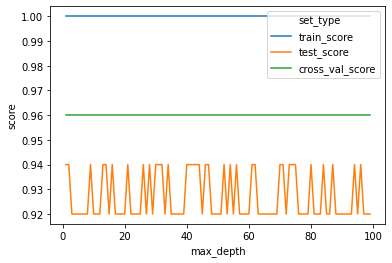

In [67]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_melt)